In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from matplotlib.lines import Line2D

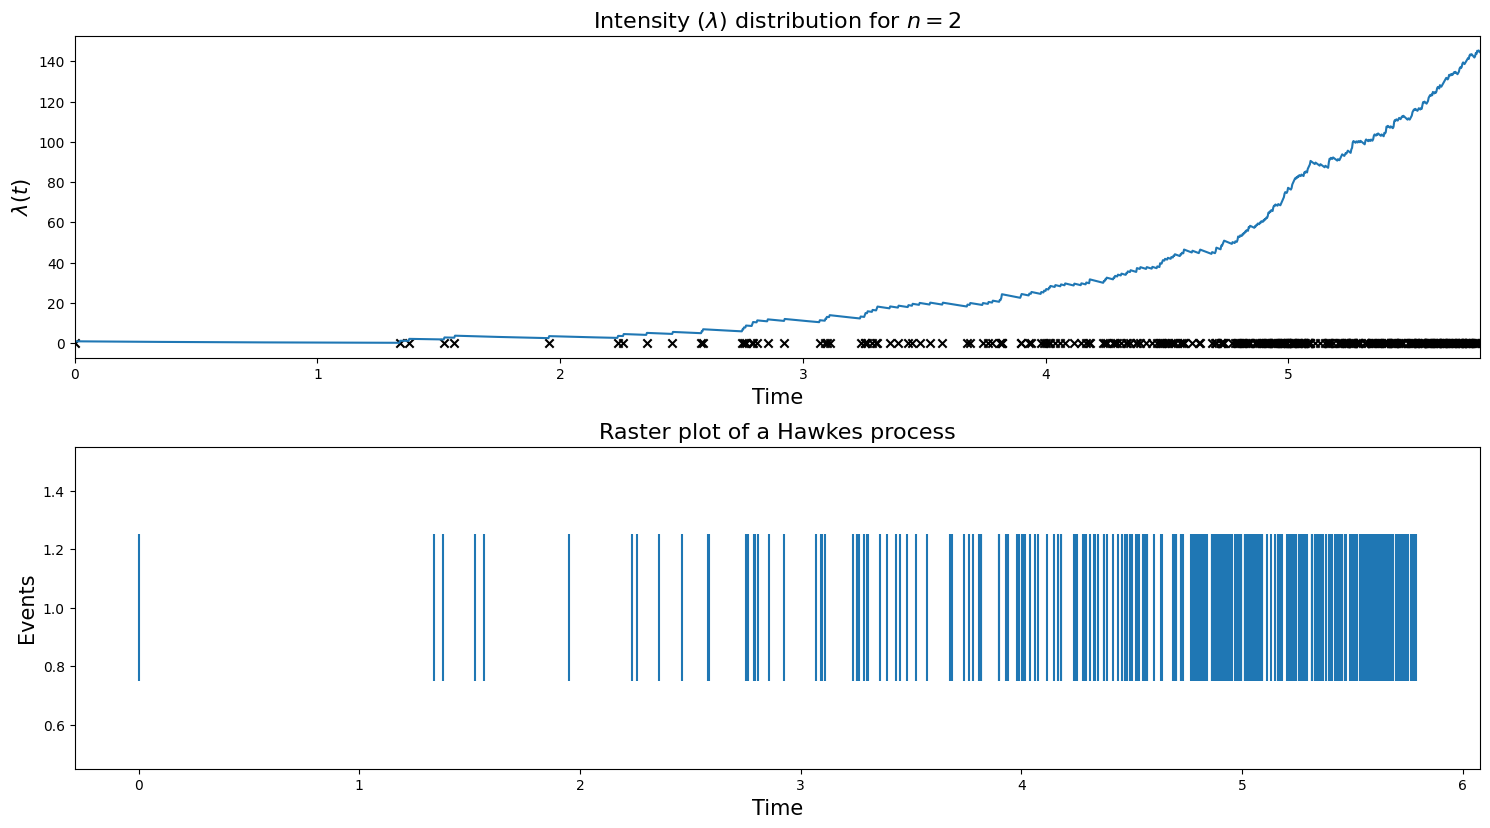

In [3]:
n_events = [0]
times_between_events = [0]
mu = 1
rate = [mu]
n=2
K = 3*10**2
for i in range(K): 
    rate_tk, xk = algorithm(rate[-1], mu, n)
    rate.append(rate_tk)
    times_between_events.append(xk)
    n_events.append(i + 1)

times = np.cumsum(times_between_events)

def intensity(past, t, mu):
    past = np.asarray(past)
    past = past[past < t]
    return mu * np.exp(-mu * (t - past)).sum()


x = np.linspace(0, max(times), 2000)
y = [intensity(times, t, mu) for t in x]

fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(3,1)


ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(x, y)
ax0.set(xlim=[0,max(times)])

ax0.scatter(times, np.random.random(len(times))*0.01, marker="x", color="black")
ax0.set_title('Intensity $(\lambda)$ distribution for $n=2$', fontsize=16)
ax0.set_xlabel('Time', fontsize=15)
ax0.set_ylabel('$\lambda (t)$', fontsize=15)


ax1 = fig.add_subplot(axgrid[1,0])
ax1.eventplot(times, orientation='horizontal', linelengths=0.5)
ax1.set_xlabel('Time', fontsize=15) 
ax1.set_ylabel('Events', fontsize=15)
ax1.set_title('Raster plot of a Hawkes process', fontsize=16)

plt.tight_layout()
plt.show()


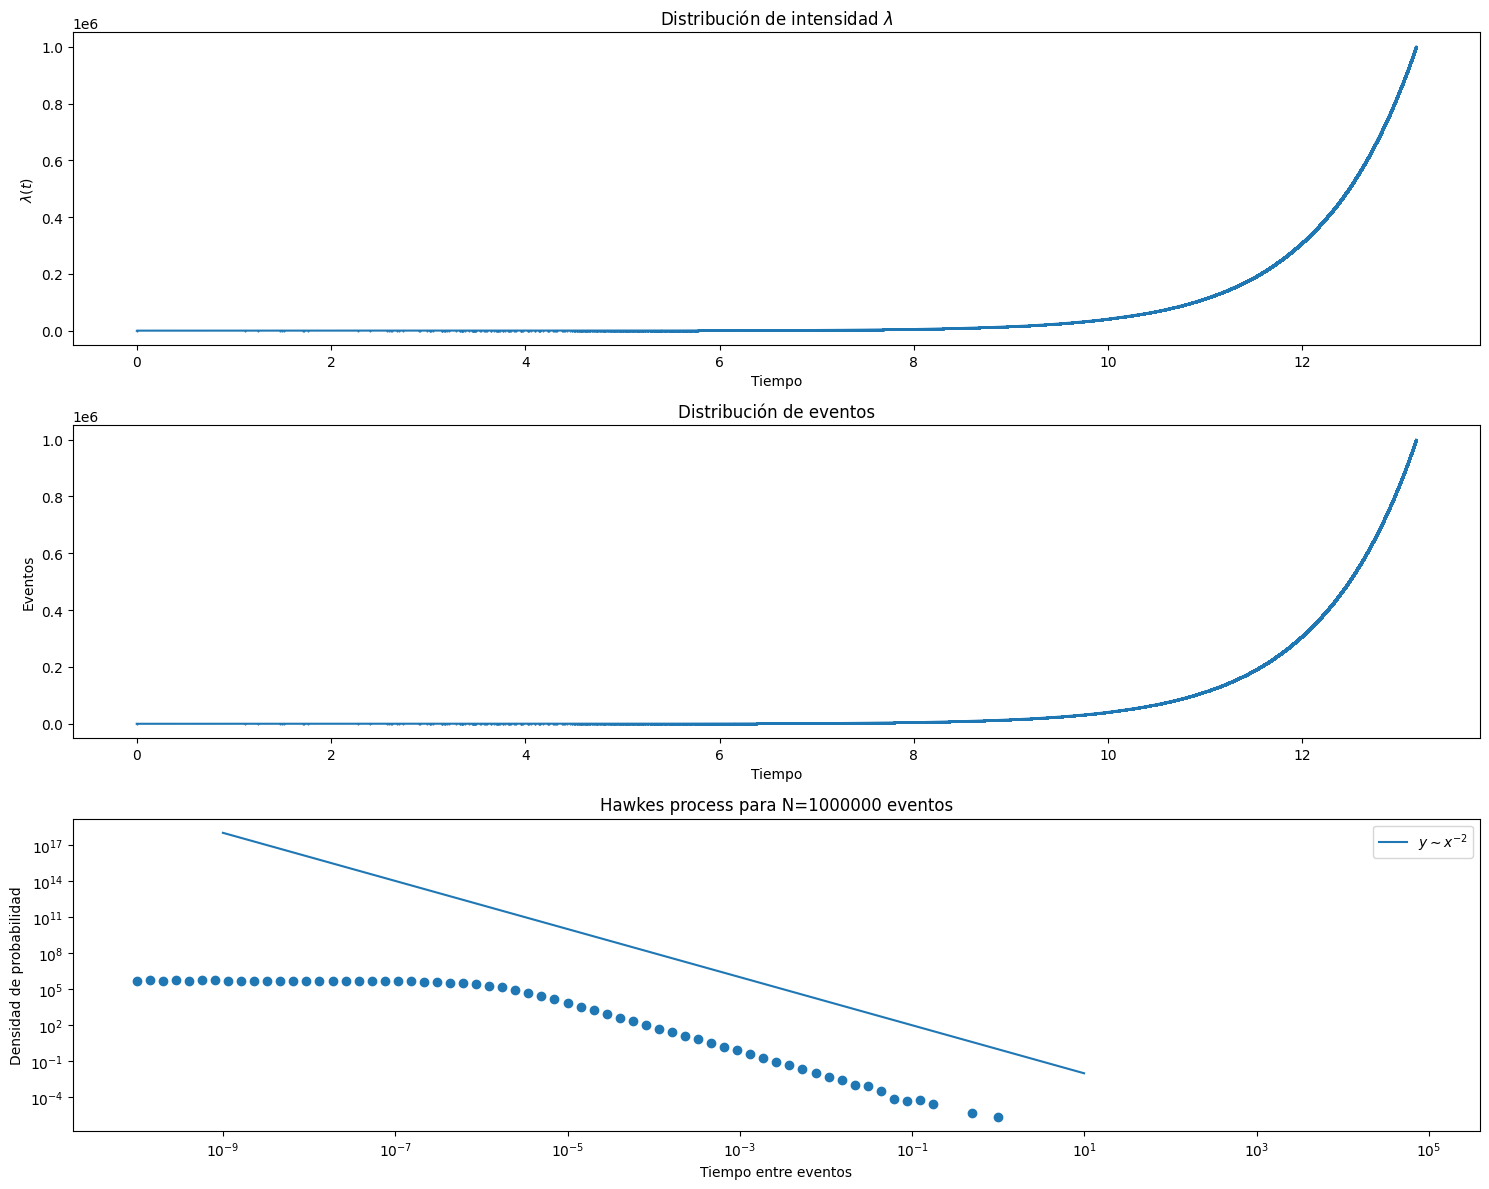

In [12]:
n_events = np.arange(K+1)
times_between_events, times, rate = generate_series_perc(K, 2, 1)

fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(3,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(times, rate, marker = 'o', ms=0.5 ,drawstyle = 'steps')
ax0.set_title('Distribución de intensidad $\lambda$')
ax0.set_xlabel('Tiempo')
ax0.set_ylabel('$\lambda (t)$')

ax1 = fig.add_subplot(axgrid[2,0])
x = np.arange(10**-9,10,0.1)
y = 1/x**2

bins = np.logspace(-10, 5, num = 100, base = 10)
hist = np.histogram(times_between_events, bins=bins, density=True)


ax1.plot(x, y, label = '$y\sim x^{-2}$')
#ax1.hist(times_between_events, bins=100000, density=True, log=True, alpha=0.5, color='blue', histtype='step' )
ax1.scatter(bins[:-1], hist[0], marker = 'o', )
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title(f'Hawkes process para N={n_events[-1]} eventos')
ax1.legend()
ax1.set_xlabel('Tiempo entre eventos')
ax1.set_ylabel('Densidad de probabilidad')

ax2 = fig.add_subplot(axgrid[1,0])
ax2.plot(times, n_events, marker = 'o', ms=0.5 , drawstyle = 'steps-post')
ax2.set_title('Distribución de eventos')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Eventos')


fig.tight_layout()
plt.show()

In [2]:
K = 10**6
n = 2
mu = 10**-4
times_between_events, times, rate = generate_series_perc(K, n, mu)

In [3]:
deltas = np.logspace(-10, 4, num = 100, base = 10)
percolation_strength = calculate_percolation_strength(times_between_events, deltas) 

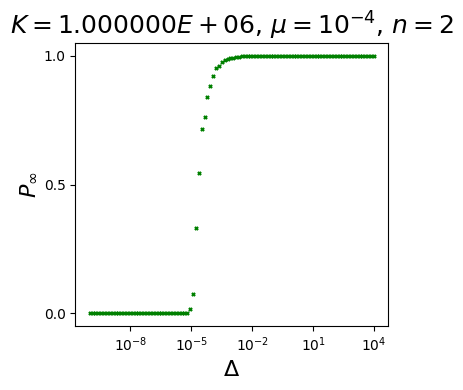

In [4]:
plt.figure(figsize=(4, 4))
plt.scatter(deltas, percolation_strength, color = 'green', marker = 'x', s = 5)
plt.xscale('log')
plt.yticks([0,0.5,1.0])
plt.xlabel('$\Delta$', fontsize = 16)
plt.ylabel('$P_{\infty}$', fontsize = 16)
plt.title(f'$K={K:.0E}$, $\mu = 10^{{-4}}$, $n = {n}$', fontsize = 18)
plt.tight_layout()

In [5]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
print(f'El valor de delta1 es {delta1}')

El valor de delta1 es 0.9768972124026539


In [6]:
mu = 100
times_between_events, times, rate = generate_series_perc(K, n, mu)

In [7]:
deltas = np.logspace(-10, 4, num = 100, base = 10)
percolation_strength = calculate_percolation_strength(times_between_events, deltas) 

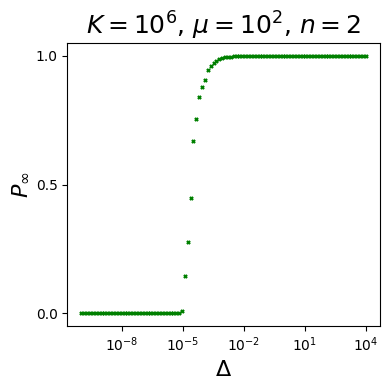

In [8]:
plt.figure(figsize=(4, 4))
plt.scatter(deltas, percolation_strength, color = 'green', marker = 'x', s = 5)
plt.xscale('log')
plt.yticks([0,0.5,1.0])
plt.xlabel('$\Delta$', fontsize = 16)
plt.ylabel('$P_{\infty}$', fontsize = 16)
plt.title(f'$K={K:.0E}$, $\mu = 10^{{2}}$, $n = {n}$', fontsize = 18)
plt.tight_layout()

In [9]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
print(f'El valor de delta1 es {delta1}')

El valor de delta1 es 0.0009700448670734597


In [10]:
clusters = identify_clusters(times, delta1)
print(f'El número de clusters es {len(clusters)}')

El número de clusters es 446


In [11]:
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

In [12]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas = [delta1*0.01, delta1, delta1**(5/2), delta1*10**3]
labels = ['$\Delta=10^{-2}\Delta_1^*$','$\Delta=\Delta_1^*$','$\Delta=10^{5/2}\Delta_1^*$', '$\Delta=10^3\Delta_1^*$']

mu2 = 10**2

delta2 = np.log(K)/(mu2+np.sqrt(2*K*mu2))
deltas2 = [delta2/2, delta2, delta2*2, delta2*5]
labels2 = ['$\Delta=\Delta^*/2$','$\Delta=\Delta^*$','$\Delta=2\Delta^*$', '$\Delta=5\Delta^*$']

## Statistics for $K=10^6$, $\mu=10^{-4}$, $n=2$

In [17]:
K = 10**6
mu = 10**-4
n = 2

times, _ = generate_series(K, n, mu)

In [22]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))

clusters = identify_clusters(times, delta1/10000)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

print(len(clusters))

5010


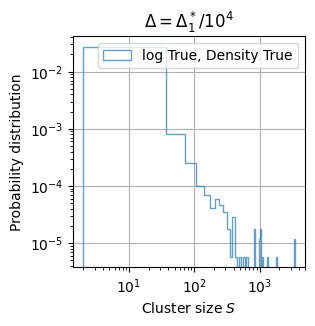

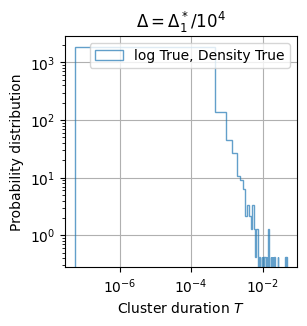

In [32]:
plt.figure(figsize=(3, 3))
plt.hist(cluster_sizes, bins=100, log=True, density=True, alpha=0.7, label = 'log True, Density True', histtype='step')
#plt.plot(x1, y1, label = '$y\sim x^{-2}$')
plt.xlabel('Cluster size $S$')
plt.ylabel('Probability distribution')
plt.xscale('log')
plt.yscale('log')
plt.title('$\Delta = \Delta_1^*/10^4$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3))
plt.hist(cluster_times, bins=100, log=True, density=True, alpha=0.7, label = 'log True, Density True', histtype='step')
#plt.plot(x1, y1, label = '$y\sim x^{-2}$')
plt.xlabel('Cluster duration $T$')
plt.ylabel('Probability distribution')
plt.xscale('log')
plt.yscale('log')
plt.title('$\Delta = \Delta_1^*/10^4$')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
s_bins = np.logspace(0, 4, num = 20, base = 10)
ys = s_bins**(-2)
ys2 = s_bins**(-3/2)
s_hist = np.histogram(cluster_sizes, bins=s_bins, density=True)


t_bins = np.logspace(-7, -1, num = 20, base = 10)
yt = t_bins**(-2)
t_hist = np.histogram(cluster_times, bins=t_bins, density=True)

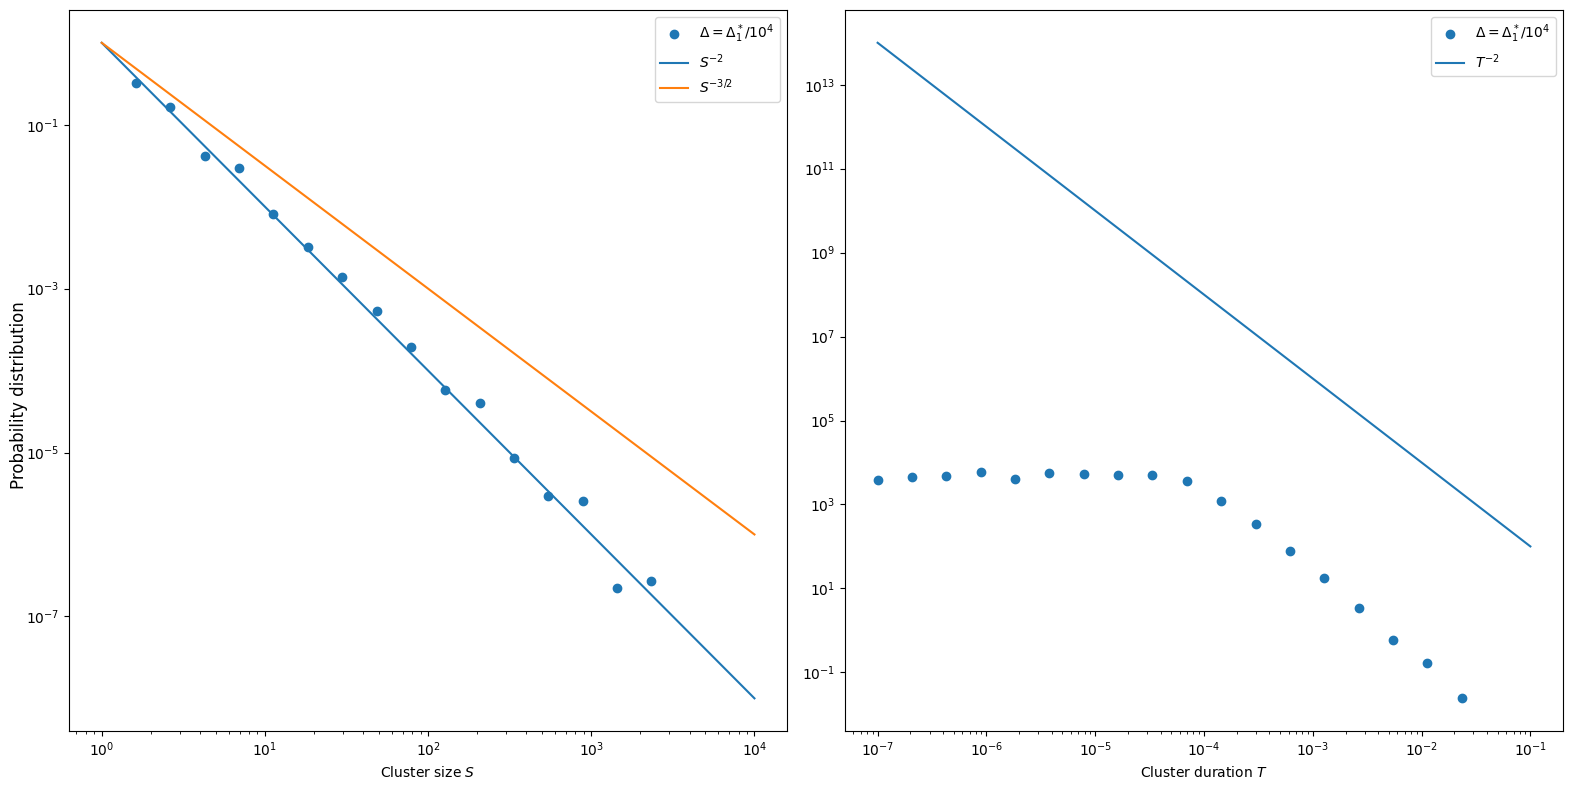

In [37]:
fig = plt.figure(figsize=(16, 8))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

ax0.scatter(s_bins[:-1], s_hist[0], label = '$\Delta = \Delta_1^*/10^4$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.plot(s_bins, ys2, label = '$S^{-3/2}$')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

ax1.scatter(t_bins[:-1], t_hist[0], label = '$\Delta = \Delta_1^*/10^4$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.supylabel('Probability distribution')
fig.tight_layout()

## Final figure

Temporal series of $K=1E+03$ events generated
Percolation plot for K=1E+03, $\mu=1E+00$ done
Temporal series of $K=1E+04$ events generated
Percolation plot for K=1E+04, $\mu=1E+00$ done
Temporal series of $K=1E+05$ events generated
Percolation plot for K=1E+05, $\mu=1E+00$ done
Plot 0 done
Temporal series of $K=1E+03$ events generated
Percolation plot for K=1E+03, $\mu=1E-04$ done
Temporal series of $K=1E+04$ events generated
Percolation plot for K=1E+04, $\mu=1E-04$ done
Temporal series of $K=1E+05$ events generated
Percolation plot for K=1E+05, $\mu=1E-04$ done
Plot 1 done
Temporal series of $K=1E+03$ events generated
Percolation plot for K=1E+03, $\mu=1E+02$ done
Temporal series of $K=1E+04$ events generated
Percolation plot for K=1E+04, $\mu=1E+02$ done
Temporal series of $K=1E+05$ events generated
Percolation plot for K=1E+05, $\mu=1E+02$ done
Plot 2 done


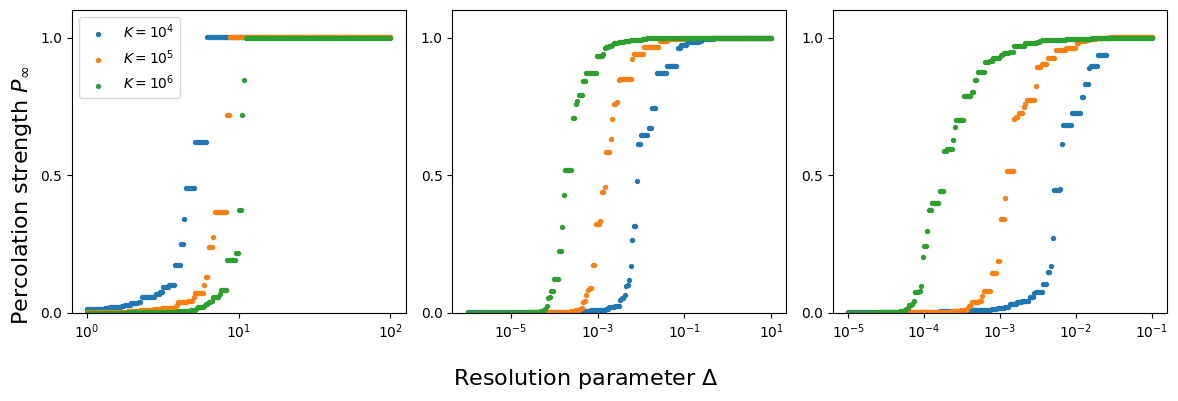

In [61]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

mus = [1, 10**-4, 10**2]
ns = [0, 2, 2]
labels = ['$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(0, 2, num = 200, base = 10), np.logspace(-5, 1, num = 200, base = 10), np.logspace(-5, -1, num = 200, base = 10)]
for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        print(f'Temporal series of $K={K:.0E}$ events generated')
        times_between_events, _, _ = generate_series_perc(K, n, mu)
        delta = deltas[i]
        percolation_strength = calculate_percolation_strength(times_between_events, delta)
        ax.scatter(delta, percolation_strength, s=8)
        print(f'Percolation plot for K={K:.0E}, $\mu={mu:.0E}$ done')
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])
    print(f'Plot {i} done')

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='upper left', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()
#fig.savefig('percolation_strength.png')

In [7]:
K = 10**6
n = 2
mu = 10**-4
times, _ = generate_series(K, n, mu)

In [9]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2]
labels = ['$\Delta=10^{-6}$','$\Delta=10^{-5}$','$\Delta=10^{-4} $', '$\Delta=10^{-3} $','$\Delta=10^{-2} $']
#labels = ['$\Delta=10^{-4}\Delta_1^*$','$\Delta=10^{-3}\Delta_1^*$','$\Delta=10^{-2}\Delta_1^*$', '$\Delta=10^{-1}\Delta_1^*$','$\Delta=\Delta_1^*$']

mu2 = 10**2

delta2 = np.log(K)/(mu2+np.sqrt(2*K*mu2))
deltas2 = [delta2/2, delta2, delta2*2, delta2*5]
labels2 = ['$\Delta=\Delta^*/2$','$\Delta=\Delta^*$','$\Delta=2\Delta^*$', '$\Delta=5\Delta^*$']

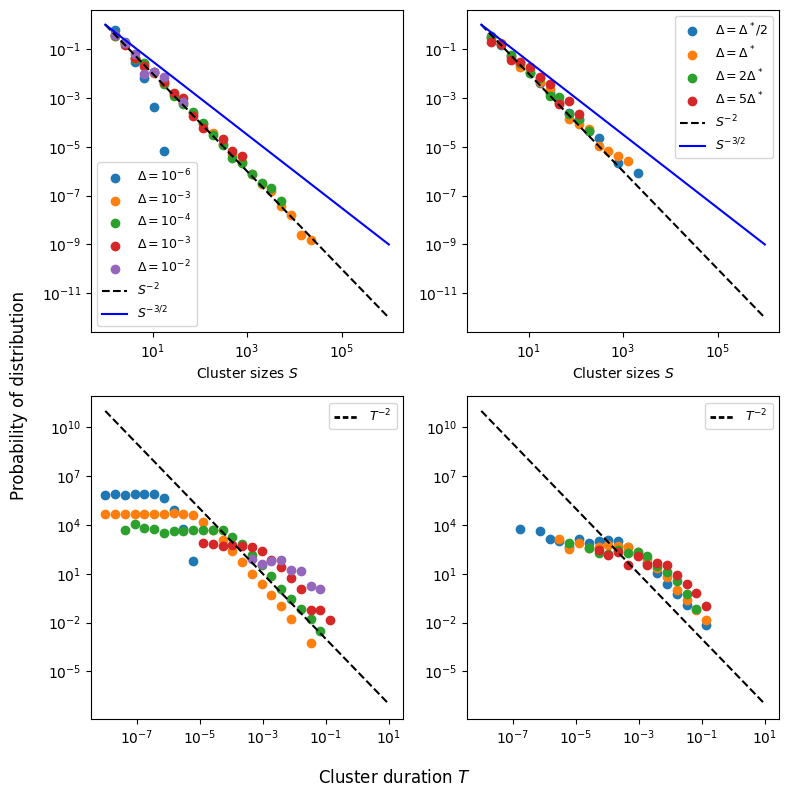

In [10]:
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[1,0])
ax2 = fig.add_subplot(axgrid[0,1])
ax3 = fig.add_subplot(axgrid[1,1])

s_bins = np.logspace(0, 6, num = 40, base = 10)
t_bins = np.logspace(-8, 1, num = 40, base = 10)
for i in range(len(deltas)):
    clusters = identify_clusters(times, deltas[i])
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    
    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    ax0.scatter(s_bins[:-1], s_hist[0], label=labels[i])
    
    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
    ax1.scatter(t_bins[:-1], t_hist[0], label=labels[i])
    
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

ax0.plot(s_bins, y_s, label='$S^{-2}$', color='black', linestyle='--')
ax1.plot(t_bins, y_t, label='$T^{-2}$', color='black', linestyle='--')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$', color='blue')

times, _ = generate_series(K, n, mu2)

for i in range(len(deltas2)):
    clusters = identify_clusters(times, deltas2[i])
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    ax2.scatter(s_bins[:-1], s_hist[0], label=labels2[i])

    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)    
    ax3.scatter(t_bins[:-1], t_hist[0], label=labels2[i])

ax0.set_xscale('log')
ax0.set_yscale('log')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yscale('log')

y_t = t_bins**(-2)*10**-5
ax2.plot(s_bins, y_s, label='$S^{-2}$', color='black', linestyle='--')
ax2.plot(s_bins, y_s2, label='$S^{-3/2}$', color='blue')
ax3.plot(t_bins, y_t, label='$T^{-2}$', color='black', linestyle='--')

fig.supylabel('Probability of distribution')
fig.supxlabel('Cluster duration $T$')
fig.axes[0].legend(loc = 'best', fontsize = 9)
fig.axes[2].legend(loc = 'best', fontsize = 9)

fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'upper right', fontsize = 9)
fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'upper right', fontsize = 9 )

fig.axes[0].set_xlabel('Cluster sizes $S$')
fig.axes[2].set_xlabel('Cluster sizes $S$')

fig.tight_layout()


# Final figure

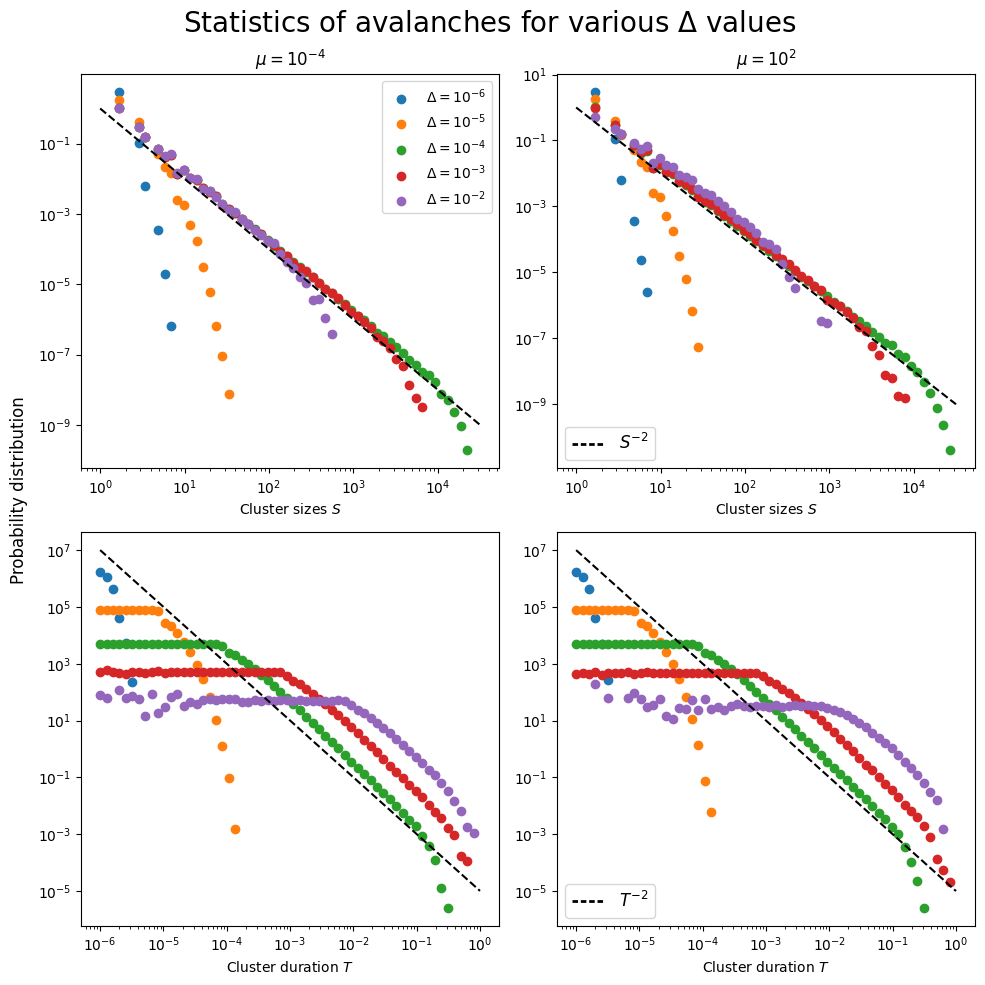

In [11]:
def plot_histograms(ax, data, bins, y_scale, x_label, title):
    hist = np.histogram(data, bins=bins, density=True)
    ax.scatter(bins[:-1], hist[0], label = title)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
def calculate_histogram_data(K, n, mu, delta, R=100):
    all_cluster_sizes = []
    all_cluster_times = []

    for _ in range(R):
        times, _ = generate_series(K, n, mu)
        clusters = identify_clusters(times, delta)
        cluster_sizes = [len(cluster) for cluster in clusters]
        cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
        all_cluster_sizes.extend(cluster_sizes)
        all_cluster_times.extend(cluster_times)

    return all_cluster_sizes, all_cluster_times

R = 10**3
K = 10**5
n = 2
mu_values = [10**-4, 10**2]
deltas = np.logspace(-6, -2, num=5, base=10)
delta_labels = ['$\Delta=10^{-6}$', '$\Delta=10^{-5}$', '$\Delta=10^{-4}$', '$\Delta=10^{-3}$', '$\Delta=10^{-2}$']

s_bins = np.logspace(0, 4.5, num=60, base=10)
t_bins = np.logspace(-6, 0, num=60, base=10)

y_s = s_bins**(-2)
y_t = t_bins**(-2) * 10**-5
y_s2 = s_bins**(-3/2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Añadir ylabel a la figura principal
fig.supylabel('Probability distribution', va='center', rotation='vertical')

for col, mu in enumerate(mu_values):
    all_sizes = []
    all_times = []
    for delta_idx, delta in enumerate(deltas):
        sizes, times = calculate_histogram_data(K, n, mu, delta, R)
        all_sizes.append(sizes)
        all_times.append(times)
    
        # Plot cluster sizes
        plot_histograms(
            axes[0, col],
            sizes,
            s_bins,
            y_s,
            '',
            delta_labels[delta_idx]
        )
        axes[0, col].set_ylabel('')
        axes[0, col].set_xlabel('Cluster sizes $S$')

        # Plot cluster durations
        plot_histograms(
            axes[1, col],
            times,
            t_bins,
            y_t,
            'Cluster duration $T$',
            f'$\Delta=10^{{{int(np.log10(delta))}}}$'
        )
        axes[1, col].set_ylabel('')
        axes[1, col].set_xlabel('Cluster duration $T$')

    # Añadir título solo en las figuras de arriba
    axes[0, col].set_title(f'$\mu = 10^{{{int(np.log10(mu))}}}$')

# Añadir etiquetas del eje x en las figuras de abajo
for ax in axes[1]:
    ax.set_xlabel('Cluster duration $T$')

# Ajustar tamaño de la figura
fig.set_size_inches(10, 10)
fig.axes[0].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[1].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[2].plot(t_bins, y_t, color='black', linestyle='--')
fig.axes[3].plot(t_bins, y_t, color='black', linestyle='--')

fig.axes[0].legend(loc = 'best')
fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 12)
fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$S^{-2}$'], loc = 'lower left', fontsize = 12)
fig.suptitle(f'Statistics of avalanches for various $\Delta$ values', fontsize=20)
fig.tight_layout()

plt.show()


### We're gonna do $R=10^3$ iterations for $K=10^5$
#### We're saving the data here
First configuration, $\mu=10^{-4}$

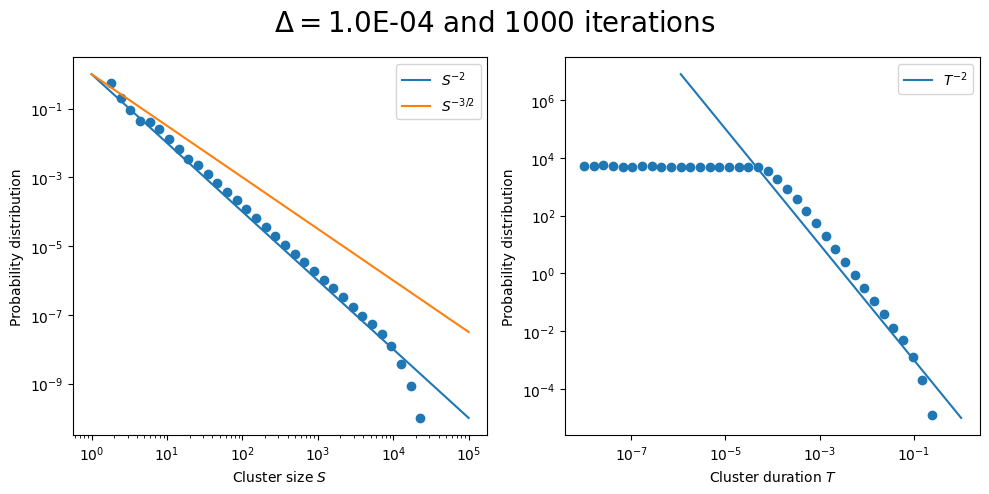

In [12]:
R = 10**3
K = 10**5
n = 2
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-4

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    clusters = identify_clusters(times, delta)
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
#np.save(f'cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 40, base = 10)
t_bins = np.logspace(-8, 0, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

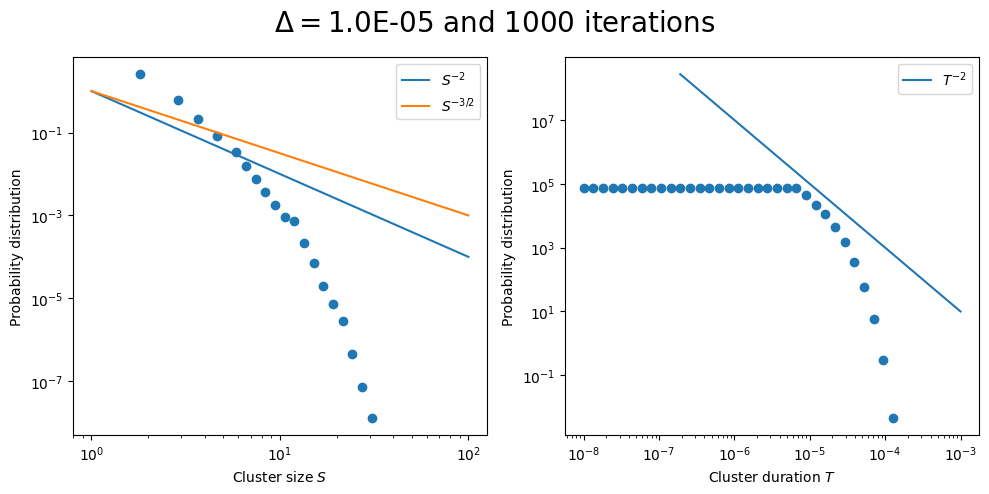

In [13]:
R = 10**3
K = 10**5
n = 2
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-5

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    clusters = identify_clusters(times, delta)
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
#np.save(f'cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 2, num = 40, base = 10)
t_bins = np.logspace(-8, -3, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

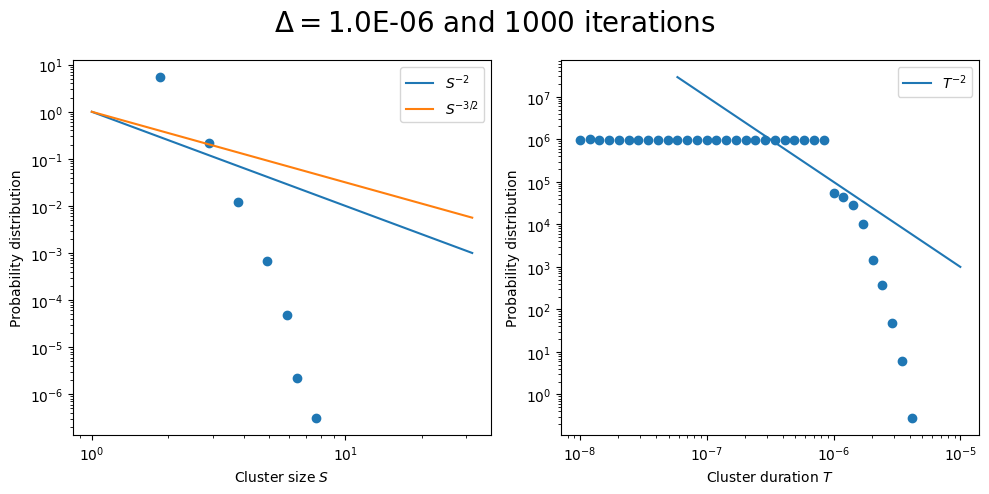

In [14]:
R = 10**3
K = 10**5
n = 2
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-6

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    clusters = identify_clusters(times, delta)
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
#np.save(f'cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)

s_bins = np.logspace(0, 1.5, num = 40, base = 10)
t_bins = np.logspace(-8, -5, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-7
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

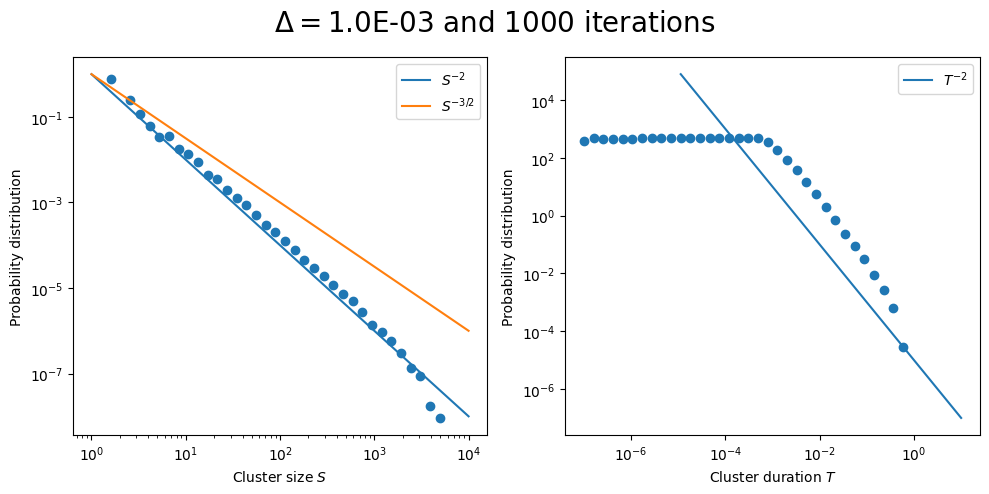

In [15]:
R = 10**3
K = 10**5
n = 2
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-3

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    clusters = identify_clusters(times, delta)
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
#np.save(f'cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)

s_bins = np.logspace(0, 4, num = 40, base = 10)
t_bins = np.logspace(-7, 1, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

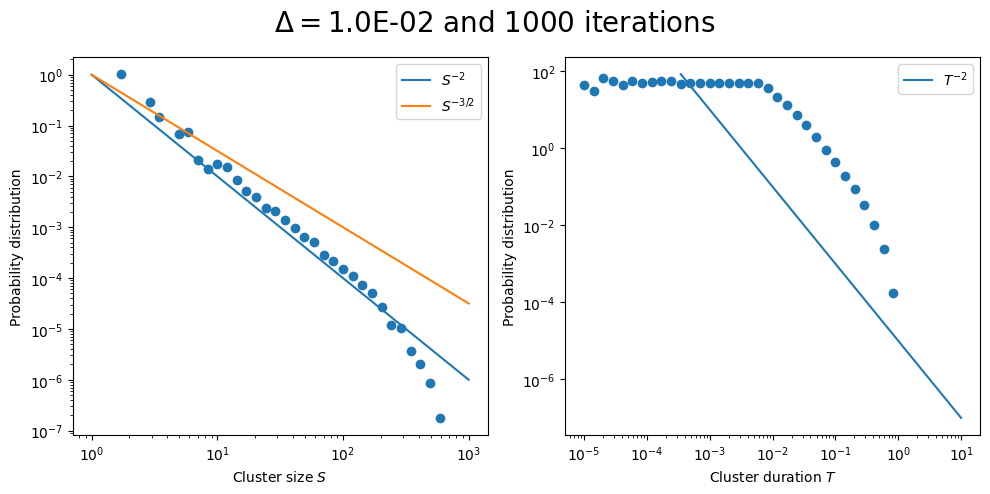

In [16]:
R = 10**3
K = 10**5
n = 2
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-2

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    clusters = identify_clusters(times, delta)
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
#np.save(f'cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)

s_bins = np.logspace(0, 3, num = 40, base = 10)
t_bins = np.logspace(-5, 1, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### Second configuration, $\mu=10^2$

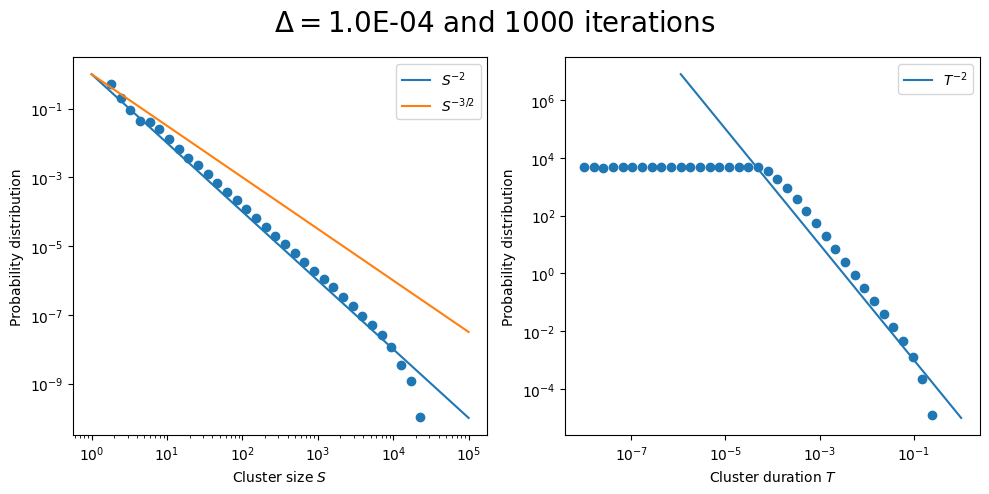

In [17]:
R = 10**3
K = 10**5
n = 2
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-4

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    clusters = identify_clusters(times, delta)
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
#np.save(f'cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 40, base = 10)
t_bins = np.logspace(-8, 0, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

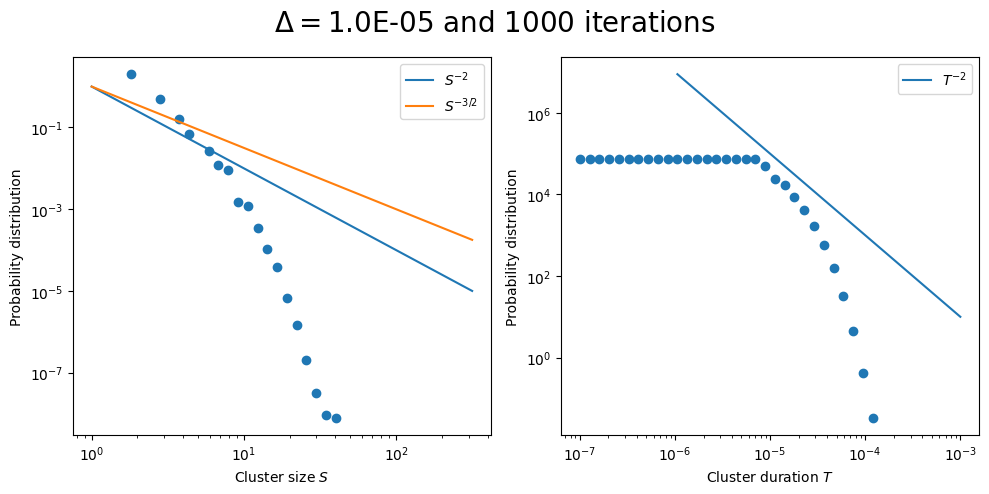

In [18]:
R = 10**3
K = 10**5
n = 2
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-5

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    clusters = identify_clusters(times, delta)
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
#np.save(f'cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)

s_bins = np.logspace(0, 2.5, num = 40, base = 10)
t_bins = np.logspace(-7, -3, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

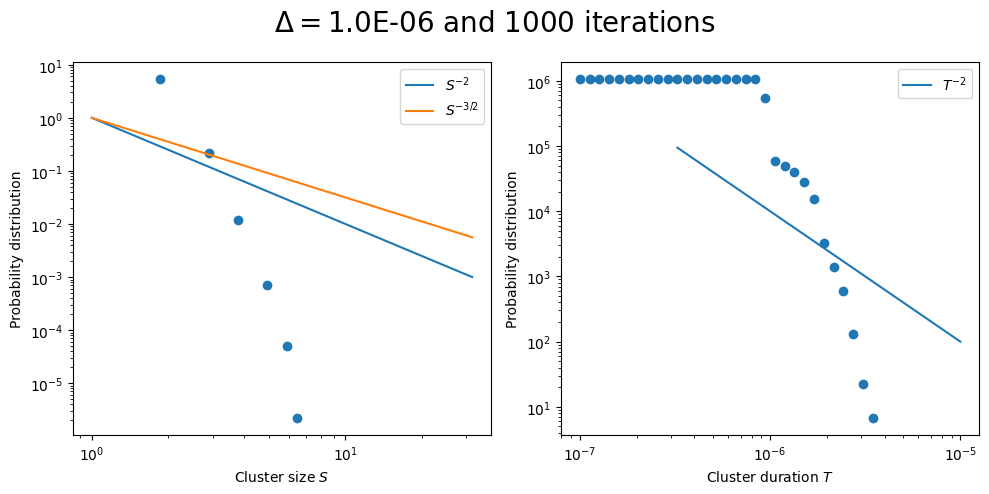

In [19]:
R = 10**3
K = 10**5
n = 2
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-6

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    clusters = identify_clusters(times, delta)
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
#np.save(f'cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)

s_bins = np.logspace(0, 1.5, num = 40, base = 10)
t_bins = np.logspace(-7, -5, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-8
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

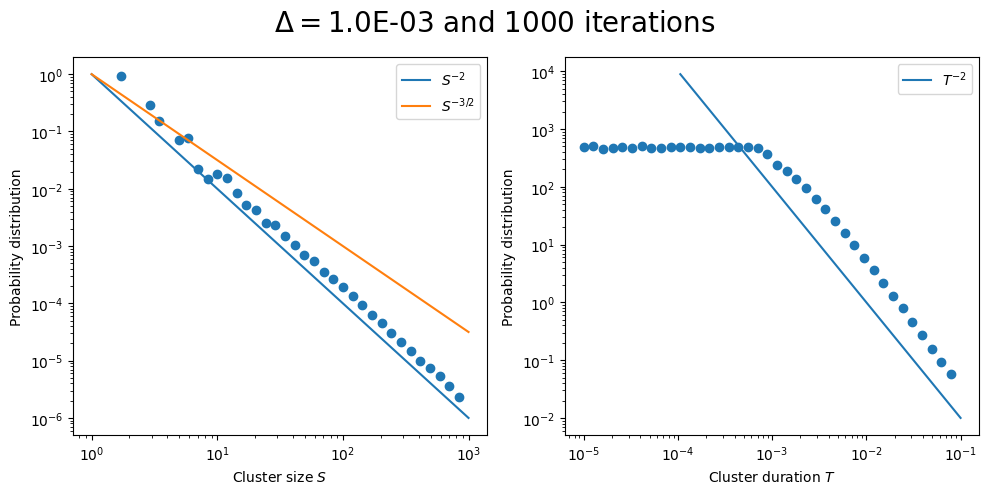

In [20]:
R = 10**3
K = 10**5
n = 2
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-3

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    clusters = identify_clusters(times, delta)
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
#np.save(f'cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)

s_bins = np.logspace(0, 3, num = 40, base = 10)
t_bins = np.logspace(-5, -1, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-4
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

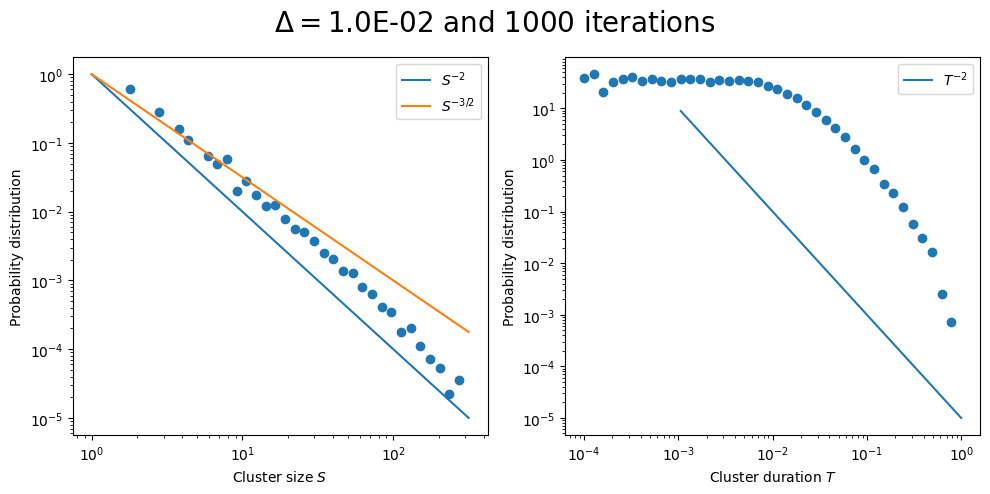

In [21]:
R = 10**3
K = 10**5
n = 2
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-2

for _ in range(R):
    times, _ = generate_series(K, n, mu)
    clusters = identify_clusters(times, delta)
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
#np.save(f'cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)

s_bins = np.logspace(0, 2.5, num = 40, base = 10)
t_bins = np.logspace(-4, -0, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

## Final figure

def plot_histograms(ax, data, bins, y_scale, title):
    hist = np.histogram(data, bins=bins, density=True)
    ax.scatter(bins[:-1], hist[0], label = title)
    ax.plot(bins, y_scale)
    ax.set_yscale('log')
    
def calculate_histogram_data(K, n, mu, delta, R=100):
    all_cluster_sizes = []
    all_cluster_times = []

    for _ in range(R):
        times, _ = generate_series(K, n, mu)
        clusters = identify_clusters(times, delta)
        cluster_sizes = [len(cluster) for cluster in clusters]
        cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
        all_cluster_sizes.extend(cluster_sizes)
        all_cluster_times.extend(cluster_times)

    return all_cluster_sizes, all_cluster_times

R = 10**3
K = 10**5
n = 2
mu_values = [10**-4, 10**2]
deltas = np.logspace(-6, -2, num=5, base=10)
delta_labels = ['$\Delta=10^{-6}$', '$\Delta=10^{-5}$', '$\Delta=10^{-4}$', '$\Delta=10^{-3}$', '$\Delta=10^{-2}$']

s_bins = np.logspace(0, 4.5, num=60, base=10)
t_bins = np.logspace(-6, 0, num=60, base=10)

y_s = s_bins**(-2)
y_t = t_bins**(-2) * 10**-5
y_s2 = s_bins**(-3/2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Añadir ylabel a la figura principal
fig.supylabel('Probability distribution', va='center', rotation='vertical')

for col, mu in enumerate(mu_values):
    all_sizes = []
    all_times = []
    for delta_idx, delta in enumerate(deltas):
        sizes, times = calculate_histogram_data(K, n, mu, delta, R)
        all_sizes.append(sizes)
        all_times.append(times)
        # Plot cluster sizes
        plot_histograms(
            axes[0, col],
            sizes,
            s_bins,
            y_s,
            '',
            delta_labels[delta_idx]
        )
        axes[0, col].set_ylabel('')
        axes[0, col].set_xlabel('Cluster sizes $S$')

        # Plot cluster durations
        plot_histograms(
            axes[1, col],
            times,
            t_bins,
            y_t,
            'Cluster duration $T$',
            f'$\Delta={delta:.1E}$'
        )
        axes[1, col].set_ylabel('')
        axes[1, col].set_xlabel('Cluster duration $T$')

    # Añadir título solo en las figuras de arriba
    axes[0, col].set_title(f'$\mu = 10^{{{int(np.log10(mu))}}}$')

# Añadir etiquetas del eje x en las figuras de abajo
for ax in axes[1]:
    ax.set_xlabel('Cluster duration $T$')

# Ajustar tamaño de la figura
fig.set_size_inches(10, 10)

fig.axes[0].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[1].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[2].plot(t_bins, y_t, color='black', linestyle='--')
fig.axes[3].plot(t_bins, y_t, color='black', linestyle='--')

fig.axes[0].legend(loc = 'best')
fig.axes[2].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 12)
fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$S^{-2}$'], loc = 'lower left', fontsize = 12)


fig.suptitle(f'Statistics of avalanches for various $\Delta$ values', fontsize=20)
fig.tight_layout()

# Darle a los 3 puntos y cambiar celda a código

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


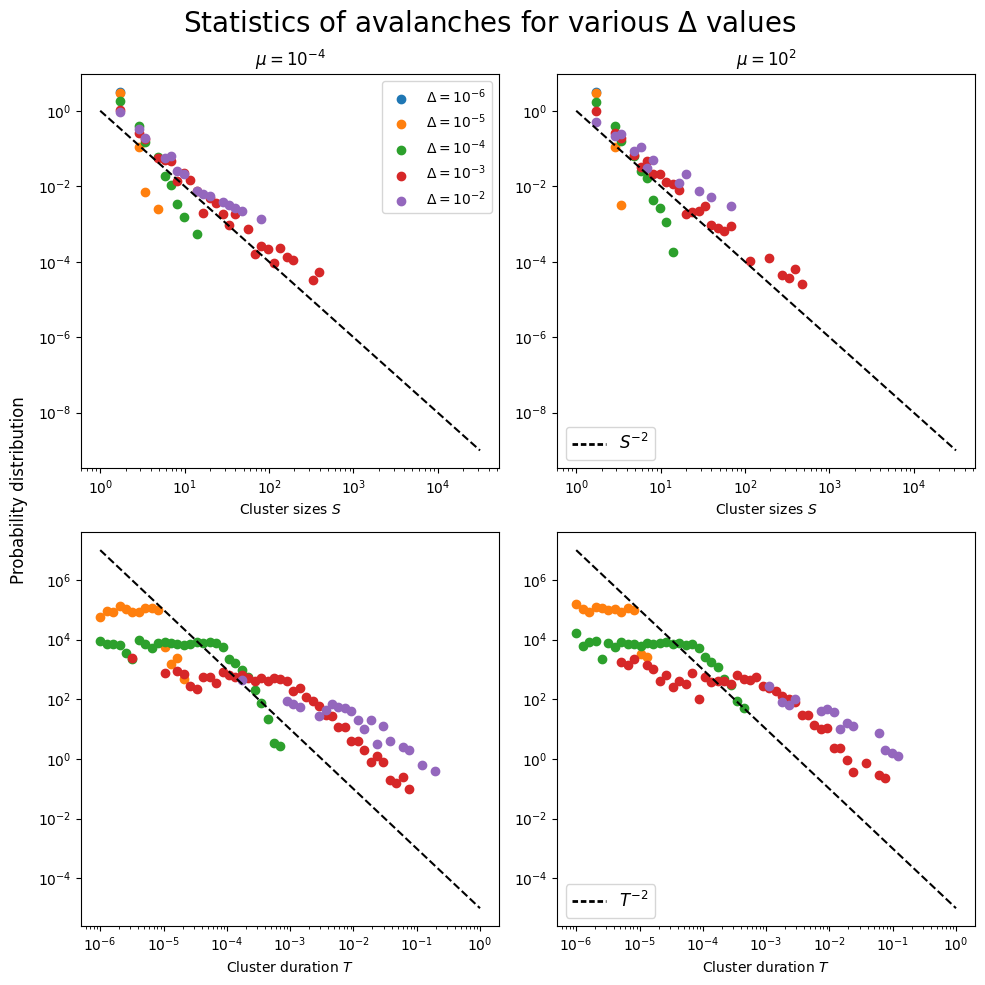

In [22]:
def plot_histograms(ax, data, bins, y_scale, x_label, title):
    hist = np.histogram(data, bins=bins, density=True)
    ax.scatter(bins[:-1], hist[0], label = title)
    #ax.plot(bins, y_scale)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_xlabel(x_label)
    #ax.legend()

def calculate_histogram_data(K, n, mu, delta, R=100):
    all_cluster_sizes = []
    all_cluster_times = []

    for _ in range(R):
        times, _ = generate_series(K, n, mu)
        clusters = identify_clusters(times, delta)
        cluster_sizes = [len(cluster) for cluster in clusters]
        cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
        all_cluster_sizes.extend(cluster_sizes)
        all_cluster_times.extend(cluster_times)

    return all_cluster_sizes, all_cluster_times

R = 1
K = 10**4
n = 2
mu_values = [10**-4, 10**2]
deltas = np.logspace(-6, -2, num=5, base=10)
delta_labels = ['$\Delta=10^{-6}$', '$\Delta=10^{-5}$', '$\Delta=10^{-4}$', '$\Delta=10^{-3}$', '$\Delta=10^{-2}$']

s_bins = np.logspace(0, 4.5, num=60, base=10)
t_bins = np.logspace(-6, 0, num=60, base=10)

y_s = s_bins**(-2)
y_t = t_bins**(-2) * 10**-5
y_s2 = s_bins**(-3/2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Añadir ylabel a la figura principal
fig.supylabel('Probability distribution', va='center', rotation='vertical')

for col, mu in enumerate(mu_values):
    all_sizes = []
    all_times = []
    for delta_idx, delta in enumerate(deltas):
        sizes, times = calculate_histogram_data(K, n, mu, delta, R)
        all_sizes.append(sizes)
        all_times.append(times)
    
        # Plot cluster sizes
        plot_histograms(
            axes[0, col],
            sizes,
            s_bins,
            y_s,
            '',
            delta_labels[delta_idx]
        )
        axes[0, col].set_ylabel('')
        axes[0, col].set_xlabel('Cluster sizes $S$')

        # Plot cluster durations
        plot_histograms(
            axes[1, col],
            times,
            t_bins,
            y_t,
            'Cluster duration $T$',
            f'$\Delta=10^{{{int(np.log10(delta))}}}$'
        )
        axes[1, col].set_ylabel('')
        axes[1, col].set_xlabel('Cluster duration $T$')

    # Añadir título solo en las figuras de arriba
    axes[0, col].set_title(f'$\mu = 10^{{{int(np.log10(mu))}}}$')

# Añadir etiquetas del eje x en las figuras de abajo
for ax in axes[1]:
    ax.set_xlabel('Cluster duration $T$')

# Ajustar tamaño de la figura
fig.set_size_inches(10, 10)
fig.axes[0].plot(s_bins, y_s, color='black', linestyle='--')
#fig.axes[0].plot(s_bins, y_s2, color='blue')
fig.axes[1].plot(s_bins, y_s, color='black', linestyle='--')
#fig.axes[1].plot(s_bins, y_s2, color='blue')
fig.axes[2].plot(t_bins, y_t, color='black', linestyle='--')
fig.axes[3].plot(t_bins, y_t, color='black', linestyle='--')

fig.axes[0].legend(loc = 'best')
fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 12)
fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$S^{-2}$'], loc = 'lower left', fontsize = 12)
fig.suptitle(f'Statistics of avalanches for various $\Delta$ values', fontsize=20)
fig.tight_layout()

plt.show()
